# Requirements

In [30]:
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt

# Configuration

In [2]:
options = webdriver.EdgeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [3]:
# Initialize the webdriver.
browser = webdriver.Edge(options=options)

In [4]:
# Navigate to a web page.
browser.get('https://finance.yahoo.com/crypto')

In [ ]:
# Print the page source code.
print(browser.page_source)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://finance.yahoo.com/crypto. The task includes the extraction of **Cryptocurrency names** and their **price** and **market cap**. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of the prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [26]:
# Write your code here.
names = []
prices = []
market_cap = []
for i in range(0, 25):
    row = browser.find_element(By.ID, i)
    name = row.find_element(By.CSS_SELECTOR,'td:nth-child(2) div').get_attribute('title')
    price = row.find_element(By.CSS_SELECTOR, 'td:nth-child(4) span').text.replace(",","")
    cap = row.find_element(By.CSS_SELECTOR, '[data-field="marketCap"]').text
    names.append(name)
    prices.append(float(price))
    market_cap.append(cap)


In [28]:
# Add as many code boxes as you need.
data={
    "Name": names,
    "Price": prices,
    "Market Cap": market_cap
}
df = pd.DataFrame(data)
print(df)

                   Name         Price Market Cap
0           Bitcoin USD  69783.950000      1.38T
1          Ethereum USD   2450.280000   295.056B
2       Tether USDt USD      1.000100   120.511B
3               BNB USD    566.380000    81.615B
4            Solana USD    166.870000     78.58B
5          USD Coin USD      1.000100    35.201B
6               XRP USD      0.511179     29.07B
7          Dogecoin USD      0.175977     25.81B
8   Lido Staked ETH USD   2460.600000    23.985B
9      Wrapped TRON USD      0.162003    14.163B
10             TRON USD      0.162023    14.006B
11          Toncoin USD      4.680300    11.908B
12          Cardano USD      0.335261    11.732B
13      Lido wstETH USD   2905.210000    10.899B
14        Shiba Inu USD      0.000018    10.774B
15  Wrapped Bitcoin USD  69471.780000    10.213B
16        Avalanche USD     24.010000     9.776B
17             WETH USD   2453.990000     8.283B
18     Bitcoin Cash USD    342.920000     6.784B
19        Chainlink 

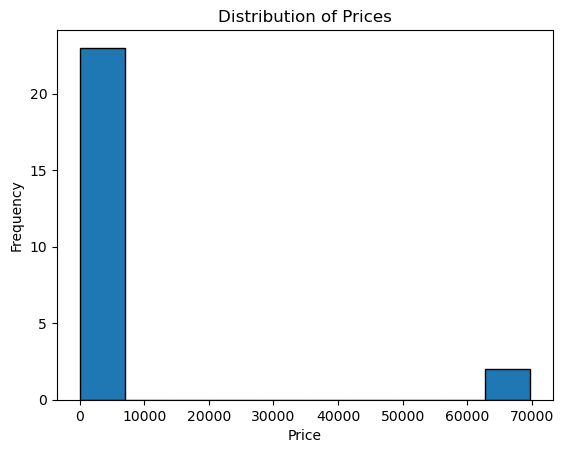

In [33]:
plt.hist(df['Price'],bins=10,edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

The additional task involves clicking on the symbol for BTC-USD and on the new page that appears click on the **Historical data**. You will extract the prices and market caps for the BTC-USD only, and make line plot for the price data.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [36]:
# Write your code here.
button=browser.find_element(By.CSS_SELECTOR,'#\\30  > td:nth-child(1) > span > div > a')
button.click()
historical_data=browser.find_element(By.CSS_SELECTOR,'#nimbus-app > section > section > aside > section > nav > ul > li:nth-child(5) > a')
historical_data.click()


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#\30  > td:nth-child(1) > span > div > a"}
  (Session info: MicrosoftEdge=130.0.2849.68); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF6522EDC65+12853]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF6525983B4+2250276]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF6524D7696+1460486]
	(No symbol) [0x00007FF6520E97CC]
	(No symbol) [0x00007FF6520E990C]
	(No symbol) [0x00007FF652123857]
	(No symbol) [0x00007FF65210853F]
	(No symbol) [0x00007FF6520E0617]
	(No symbol) [0x00007FF652121431]
	(No symbol) [0x00007FF652108163]
	(No symbol) [0x00007FF6520DFB54]
	(No symbol) [0x00007FF6520DF000]
	(No symbol) [0x00007FF6520DF741]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF65246CDA4+1024020]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF652209A04+57108]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF65246BDA3+1019923]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF65246BA09+1019001]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF65228E021+394913]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF65228A944+380868]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF65228AA89+381193]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF652282286+346374]
	BaseThreadInitThunk [0x00007FFADAE97374+20]
	RtlUserThreadStart [0x00007FFADB13CC91+33]


In [ ]:
# Add as many code boxes as you need.